# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari Kaggle. Berikut tautan untuk mengakses dataset: https://www.kaggle.com/datasets/ayeshaseherr/exame-score-dataset
   
2. **Deskripsi Dataset**:


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/SUBMISSION AKHIR/Exam_Score_Prediction.csv'
df = pd.read_csv(path)
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [ ]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [ ]:
df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [ ]:
df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

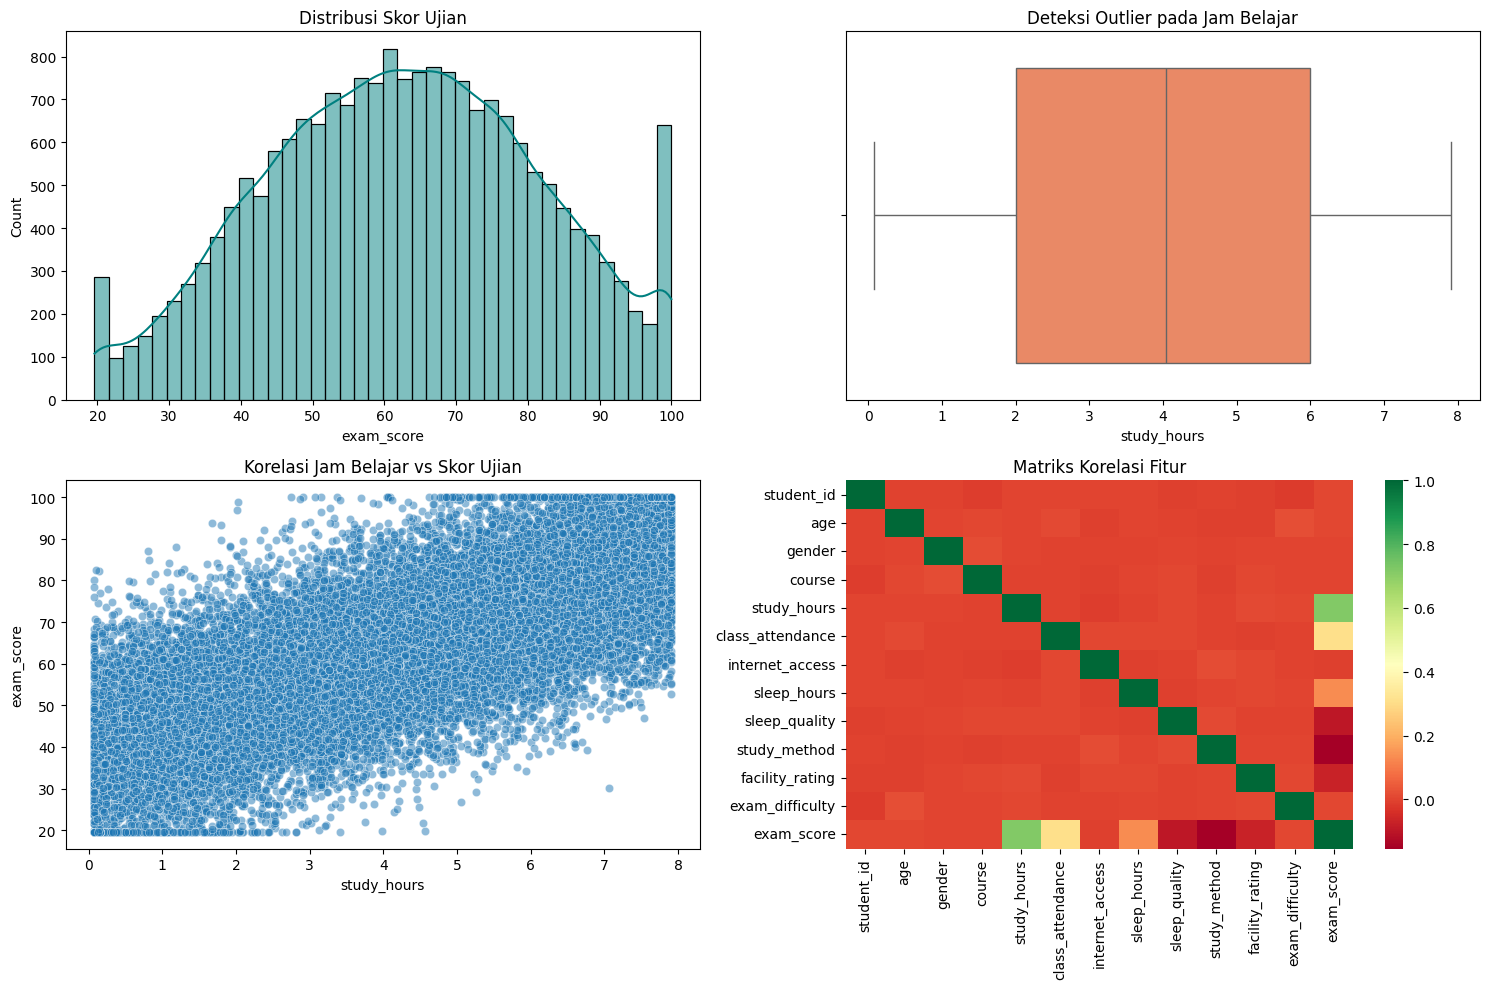

In [ ]:
plt.figure(figsize=(15, 10))

# Distribusi Target (Univariate)
plt.subplot(2, 2, 1)
sns.histplot(df['exam_score'], kde=True, color='teal')
plt.title('Distribusi Skor Ujian')

# Deteksi Outlier secara Visual (Boxplot)
plt.subplot(2, 2, 2)
sns.boxplot(x=df['study_hours'], color='coral')
plt.title('Deteksi Outlier pada Jam Belajar')

# Hubungan Fitur vs Target (Bivariate)
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='study_hours', y='exam_score', alpha=0.5)
plt.title('Korelasi Jam Belajar vs Skor Ujian')

# Heatmap Korelasi (Multivariate)
plt.subplot(2, 2, 4)
# Encoding sementara hanya untuk melihat korelasi di Heatmap
df_corr = df.copy()
for col in df_corr.select_dtypes(include=['object']).columns:
    df_corr[col] = df_corr[col].astype('category').cat.codes
sns.heatmap(df_corr.corr(), annot=False, cmap='RdYlGn')
plt.title('Matriks Korelasi Fitur')

plt.tight_layout()
plt.show()

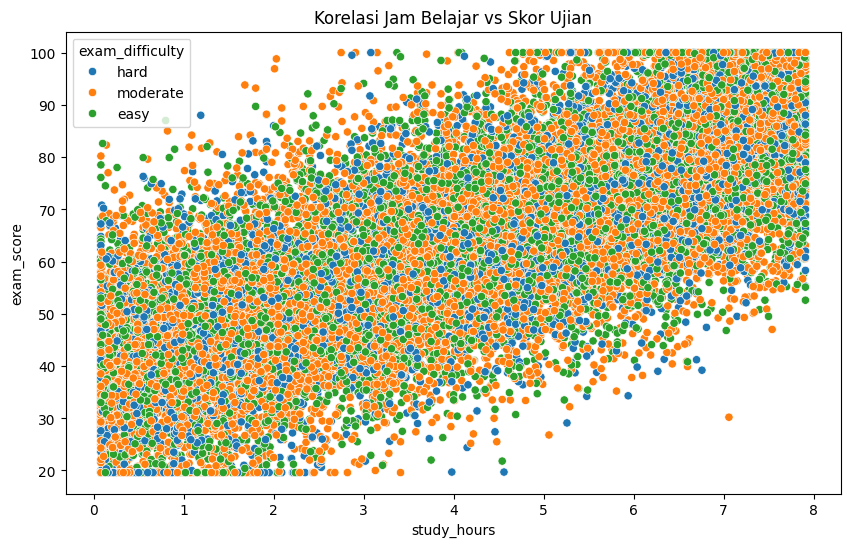

In [ ]:
# Visualisasi Korelasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='study_hours', y='exam_score', hue='exam_difficulty')
plt.title('Korelasi Jam Belajar vs Skor Ujian')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Menghapus Kolom ID & Duplikat
df_manual = df.drop(columns=['student_id']).drop_duplicates()

In [ ]:
# Menangani Missing Values
for col in df_manual.columns:
    if df_manual[col].dtype == 'object':
        df_manual[col] = df_manual[col].fillna(df_manual[col].mode()[0])
    else:
        df_manual[col] = df_manual[col].fillna(df_manual[col].median())

In [ ]:
# Penanganan Outlier (IQR Method)
numeric_check = ['study_hours', 'sleep_hours', 'class_attendance']
for col in numeric_check:
    Q1 = df_manual[col].quantile(0.25)
    Q3 = df_manual[col].quantile(0.75)
    IQR = Q3 - Q1
    df_manual = df_manual[(df_manual[col] >= (Q1 - 1.5 * IQR)) & (df_manual[col] <= (Q3 + 1.5 * IQR))]

In [ ]:
# Encoding Kategorikal Manual
df_manual['gender'] = df_manual['gender'].map({'male': 1, 'female': 2, 'other': 0})
df_manual['internet_access'] = df_manual['internet_access'].map({'yes': 1, 'no': 0})
df_manual['sleep_quality'] = df_manual['sleep_quality'].map({'poor': 0, 'average': 1, 'good': 2})
df_manual['study_method'] = df_manual['study_method'].map({
    'self-study': 0,
    'group study': 1,
    'online videos': 2,
    'coaching': 3,
    'mixed': 4
})
df_manual['course'] = df_manual['course'].map({
    'b.com': 0,
    'diploma': 1,
    'bca': 2,
    'b.sc': 3,
    'ba': 4,
    'bba': 5,
    'b.tech': 6,
})
df_manual['facility_rating'] = df_manual['facility_rating'].map({'high': 2, 'medium': 1, 'low': 0})
df_manual['exam_difficulty'] = df_manual['exam_difficulty'].map({'easy': 0, 'moderate': 1, 'hard': 2})

In [ ]:
# --- Cek Apakah Masih Ada Kolom Teks? ---
kolom_teks = df.select_dtypes(include=['object']).columns
if len(kolom_teks) > 0:
    print(f"Peringatan! Kolom ini masih berupa teks: {list(kolom_teks)}")
    # Opsional: Hapus kolom teks yang tersisa jika tidak diperlukan
    # df_manual = df_manual.drop(columns=kolom_teks)
else:
    print("Semua kolom sudah menjadi angka. Siap dilakukan scaling.")

Peringatan! Kolom ini masih berupa teks: ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']


In [ ]:
df_manual

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,1,1,2.78,92.9,1,7.4,0,3,0,2,58.9
1,23,0,2,3.37,64.8,1,4.6,1,2,1,1,54.8
2,22,1,3,7.88,76.8,1,8.5,0,3,2,1,90.3
3,20,0,1,0.67,48.4,1,5.8,1,2,0,1,29.7
4,20,2,1,0.89,71.6,1,9.8,0,3,0,1,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,0,4,6.50,71.3,1,5.0,2,0,0,0,86.5
19996,18,1,0,3.71,41.6,0,5.9,1,3,1,1,60.9
19997,19,0,1,7.88,68.2,1,4.6,0,1,0,0,64.5
19998,19,1,4,4.60,76.3,0,6.1,2,0,1,1,79.0


In [ ]:
# Standarisasi Fitur
scaler = StandardScaler()
features = [c for c in df_manual.columns if c != 'exam_score']
df_manual[features] = scaler.fit_transform(df_manual[features])

print("Prapemrosesan Manual Selesai!")
df_manual.to_csv('examscorepredict_preprocessing.csv', index=False)

Prapemrosesan Manual Selesai!


In [ ]:
print("Preprocessing Manual Selesai!")
df.to_csv('examscoreprediction_preprocessing.csv', index=False)

Preprocessing Manual Selesai!
